In [1]:
#package for data analysis
import numpy as np
import pandas as pd

#svm
from sklearn import svm

#visualisation
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)

%matplotlib inline

In [2]:
dataset = pd.read_csv('data.csv')
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


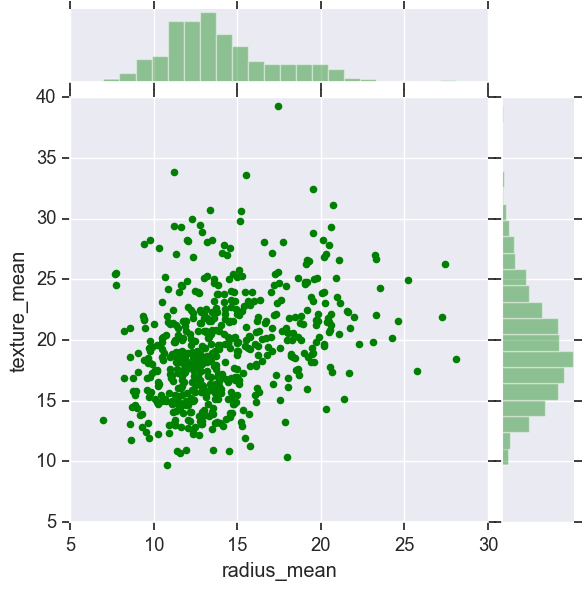

In [3]:
sns.jointplot('radius_mean','texture_mean',data=dataset,color='green')

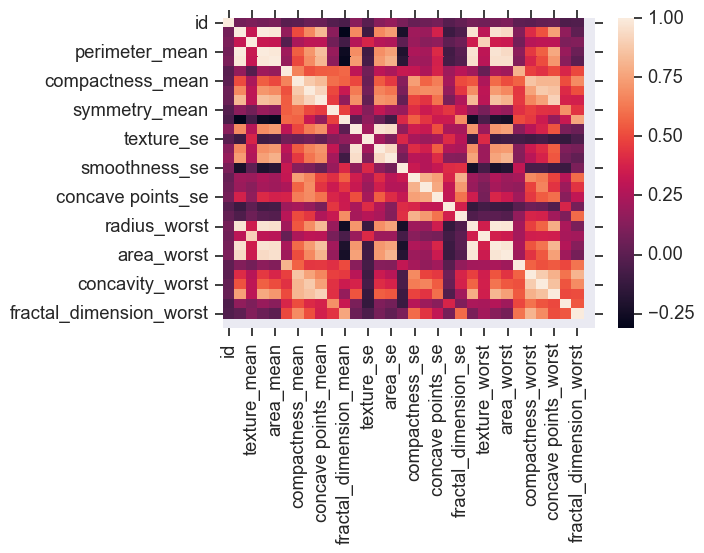

In [4]:
#print(dataset.corr())
sns.heatmap(dataset.corr())

In [5]:
#check whether any data is null
dataset.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [6]:
#

dataset=dataset.iloc[:,:-1]
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
X = dataset[['radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']]
X.head()
y = dataset['diagnosis']
y.head()

0    M
1    M
2    M
3    M
4    M
Name: diagnosis, dtype: object

In [12]:
import sklearn
print(sklearn.__file__)
from sklearn.cross_validation  import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)




C:\Users\hrajr\Anaconda3\lib\site-packages\sklearn\__init__.py


In [13]:
from sklearn.linear_model import LogisticRegression
logModel = LogisticRegression()
logModel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [19]:
y_pred=logModel.predict(X_test)
print(y_pred)

['B' 'B' 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'B'
 'M' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'M' 'B' 'B'
 'M' 'B' 'M' 'M' 'M' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'M' 'B' 'M' 'M' 'B' 'M'
 'B' 'B' 'M' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'M' 'B'
 'B' 'B' 'M' 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'M' 'M'
 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B'
 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'M' 'M' 'M' 'M' 'M' 'M' 'B' 'B' 'B'
 'B' 'B' 'B' 'B' 'M' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'M' 'B' 'M' 'B' 'M' 'B'
 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'M' 'M' 'M' 'B' 'M' 'B' 'M' 'B' 'B' 'M' 'B'
 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'B' 'B']


In [20]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          B       0.93      0.97      0.95       105
          M       0.95      0.88      0.91        66

avg / total       0.94      0.94      0.94       171



In [21]:
from sklearn.metrics import confusion_matrix
confusion_matrix=confusion_matrix(y_test,y_pred)
print(confusion_matrix)

[[102   3]
 [  8  58]]


In [25]:
print(list(y_pred).count('M'))
print(list(y_test).count('M'))
print(list(y_pred).count('B'))
print(list(y_test).count('B'))

61
66
110
105


In [29]:
print('accuracy:',list(y_pred==y_test).count(True)/len(y_pred))

accuracy: 0.935672514619883
